# Import Libraries

In [22]:
import pandas as pd
import numpy as np

# Utils
from utils.utils import PipelineTransform

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots
from plotly.offline import iplot
from termcolor import colored
from statsmodels.graphics.tsaplots import plot_acf

# Preprocessing
from sklearn.preprocessing import MinMaxScaler, RobustScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer, make_column_selector, make_column_transformer
from category_encoders import OrdinalEncoder
from sklearn.feature_selection import mutual_info_classif
from sklearn.decomposition import PCA

# Color pallet and theme
import matplotlib.colors

# Configuration

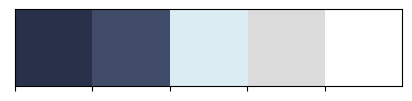

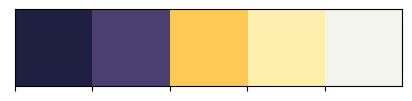

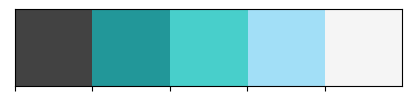

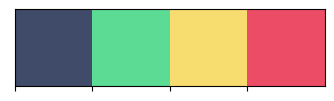

In [23]:
# Colors 1
colors = ["#283149", "#404B69", "#DBEDF3", "#DBDBDB", "#FFFFFF"]
colorsInv = ["#FFFFFF", "#DBDBDB", "#DBEDF3", "#404B69", "#283149"]
palette1 = sns.color_palette(colors)

# Colors 2
colors2 = ["#1F2041", "#4B3F72", "#FFC857", "#FFEFAF", "#F3F4ED"]
colorsInv2 = ["#F3F4ED", "#FFEFAF", "#FFC857", "#4B3F72", "#1F2041"]
palette2 = sns.color_palette(colors2)

# Colors 3
colors3 = ["#424242", "#229799", "#48CFCB", "#A2DFF7", "#F5F5F5"]  
colorsInv3 = ["#F5F5F5", "#A2DFF7", "#48CFCB", "#229799", "#424242"]
palette3 = sns.color_palette(colors3)

# Colors 4
colors4 = ['#404B69', '#5CDB95', '#F7DC6F', '#ED4C67']
colorsInv4 = ['#ED4C67', '#F7DC6F', '#5CDB95', '#404B69']
palette4 = sns.color_palette(colors4)

cmap = matplotlib.colors.ListedColormap(colorsInv)
cmap2 = matplotlib.colors.ListedColormap(colorsInv2)
cmap3 = matplotlib.colors.ListedColormap(colorsInv3)

sns.palplot(sns.color_palette(colors))

sns.palplot(sns.color_palette(colors2))

sns.palplot(sns.color_palette(colors3))

sns.palplot(sns.color_palette(colors4))

pd.set_option('display.max_columns', 40)

# Load Dataset

In [24]:
games = pd.read_csv('../data/games_clean.csv')

In [25]:
games['Release date'] = pd.to_datetime(games['Release date'])

In [26]:
games['Mac'] = games['Mac'].astype(int)

In [27]:
games['Windows'] = games['Windows'].astype(int)

In [28]:
games['Linux'] = games['Linux'].astype(int)

In [29]:
games.columns

Index(['Release date', 'Estimated owners', 'Peak CCU', 'Price', 'DLC count',
       'Supported languages', 'Windows', 'Mac', 'Linux', 'Metacritic score',
       'User score', 'Positive', 'Negative', 'Achievements', 'Recommendations',
       'Average playtime forever', 'Average playtime two weeks',
       'Median playtime forever', 'Median playtime two weeks', 'Genres',
       '+15'],
      dtype='object')

In [30]:
games.head()

,Release date,Estimated owners,Peak CCU,Price,DLC count,Supported languages,Windows,Mac,Linux,Metacritic score,User score,Positive,Negative,Achievements,Recommendations,Average playtime forever,Average playtime two weeks,Median playtime forever,Median playtime two weeks,Genres,+15
0,2021-02-26,> 20000,68,0.00,0,['English'],1,0,0,0,0,87,49,0,0,0,0,0,0,"Adventure,Casual,Free to Play,Massively Multip...",0
1,2014-11-11,> 20000,0,3.99,0,"['English', 'Polish', 'French', 'Italian', 'Ge...",1,1,1,0,0,225,45,32,0,703,0,782,0,"Action,Adventure,Indie",0
2,2019-10-02,> 20000,5,23.49,0,"['English', 'French', 'German', 'Polish', 'Rus...",1,0,0,62,0,589,212,34,427,67,0,93,0,"Indie,RPG",0
3,2016-07-01,> 20000,0,0.00,1,['English'],1,1,0,0,0,147,58,0,0,224,0,257,0,Strategy,0
4,2018-04-06,> 20000,0,2.99,0,['English'],1,1,1,0,0,36,11,19,0,11,0,11,0,"Casual,Indie",0


# Feature Engineering

## Functions

In [31]:
def scores_class(features : pd.DataFrame, target : pd.Series, discrete_features : str):
  score_classify = mutual_info_classif(features, target, discrete_features=discrete_features)
  scores = pd.DataFrame({
    'Feature': features.columns,
    'MI Score (Classify)': score_classify
  })
  return scores.sort_values(by = 'MI Score (Classify)', ascending = False)

def count_languages(word : str):
  word.replace("'", '')
  word.replace("[", '').replace("]", '')
  return len(word.split(','))

## Encode - Feature Categorical

In [32]:
categories = []
for i, row in games.iterrows():
    if type(row['Genres'].split(',')) == list:
        for cat in row['Genres'].split(','): categories.append(cat)

print(len(set(categories)))

33


In [33]:
one_hot_encode = pd.DataFrame()

for category in set(categories):
    cat = []
    for _, row in games.iterrows():
        cat.append(np.int64(category in row['Genres'].split(',')))
    one_hot_encode[category] = cat

one_hot_encode.head()

,Short,Racing,Tutorial,Movie,Massively Multiplayer,Sexual Content,Casual,Gore,Web Publishing,Game Development,Audio Production,Software Training,360 Video,Photo Editing,Adventure,Simulation,Education,Design & Illustration,Video Production,Animation & Modeling,RPG,Free to Play,Nudity,Accounting,Early Access,Action,Utilities,Sports,Episodic,Indie,Documentary,Strategy,Violent
0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [34]:
games = pd.concat((games, one_hot_encode), axis = 1)

In [35]:
games = games.drop(columns= ['Genres'])

In [36]:
label_encoder = LabelEncoder()
games['Estimated owners'] = label_encoder.fit_transform(games['Estimated owners'])

## New Features

In [37]:
pipeline_transform = PipelineTransform()

games = pipeline_transform.fit_transform(games)

In [38]:
games.drop(columns = ['Supported languages', 'Release date'], inplace = True)

## Visualization

In [39]:
ignore_columns = categories + ['Estimated owners', 'Windows', 'Mac', 'Linux', '+15']

In [40]:
games_num = games.select_dtypes(include = np.number).drop(columns = ignore_columns)

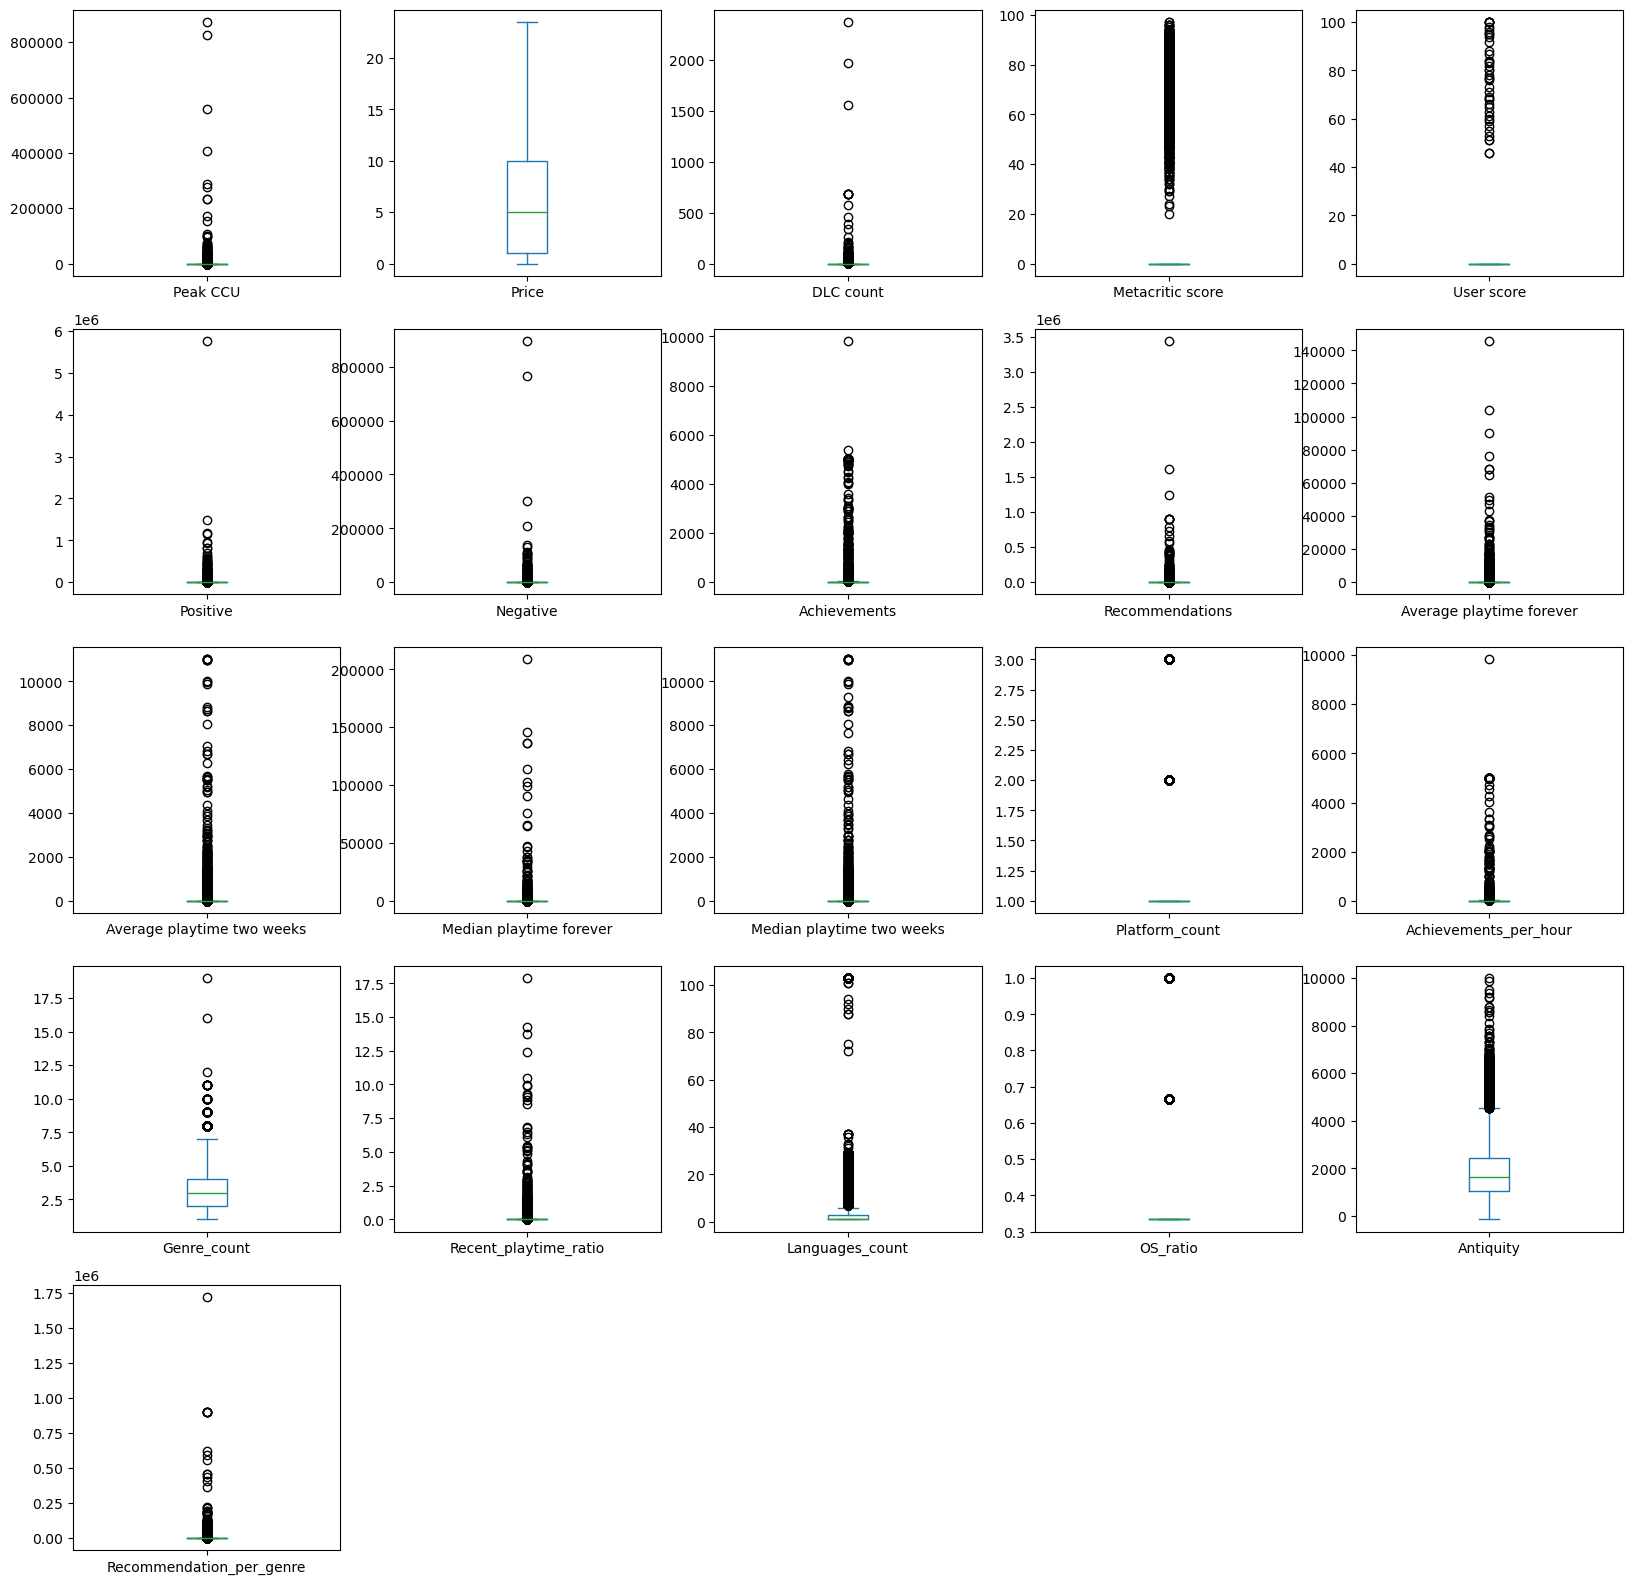

In [41]:
games_num.plot(kind = 'box', subplots = True, layout = (5, 5), figsize = (20, 20))
plt.show()

## Normalization

In [42]:
games_labels = games['Estimated owners'].copy()
games = games.drop('Estimated owners', axis = 1)

### Min-Max Scaler

In [43]:
minmax_columns = ['Price', 'OS_ratio', 'Platform_count']

In [44]:
minmax_scaler = MinMaxScaler()
games_minmax_scaled = minmax_scaler.fit_transform(games[minmax_columns])

In [45]:
minmax_df = pd.DataFrame(games_minmax_scaled, 
                          columns= minmax_scaler.get_feature_names_out())

### Robust Scaler

In [46]:
robust_columns = games_num.columns.to_list()

In [47]:
robust_scaler = RobustScaler()
games_robust_scaled = robust_scaler.fit_transform(games[robust_columns].drop(columns = minmax_columns))

In [48]:
robust_df = pd.DataFrame(games_robust_scaled, 
                         columns = robust_scaler.get_feature_names_out())

In [49]:
df_result = pd.concat((robust_df, minmax_df, games.drop(columns = robust_columns + minmax_columns)), axis = 1)

### Mutual Information

In [56]:
scores = scores_class(df_result, games_labels, discrete_features = 'auto')

In [57]:
scores

,Feature,MI Score (Classify)
4,Positive,0.399273
5,Negative,0.347540
16,Antiquity,0.246789
10,Median playtime forever,0.184664
8,Average playtime forever,0.182517
18,Price,0.180889
17,Recommendation_per_genre,0.161520
7,Recommendations,0.159586
0,Peak CCU,0.133065
12,Achievements_per_hour,0.128612


In [58]:
drop_columns = scores[scores['MI Score (Classify)'] < 0.005]

In [59]:
df_result.drop(columns = drop_columns['Feature'].values, inplace = True)

In [60]:
df_result.columns

Index(['Peak CCU', 'DLC count', 'Metacritic score', 'Positive', 'Negative',
       'Achievements', 'Recommendations', 'Average playtime forever',
       'Average playtime two weeks', 'Median playtime forever',
       'Median playtime two weeks', 'Achievements_per_hour', 'Genre_count',
       'Recent_playtime_ratio', 'Languages_count', 'Antiquity',
       'Recommendation_per_genre', 'Price', 'OS_ratio', 'Platform_count',
       'Windows', 'Mac', 'Linux', 'Casual', 'Adventure', 'RPG', 'Free to Play',
       'Indie', 'Violent'],
      dtype='object')

### PCA

In [61]:
pca = PCA(n_components = 5)
principal_components = pca.fit_transform(df_result)

pca_df = pd.DataFrame(data=principal_components, columns=['PCA1', 'PCA2', 'PCA3', 'PCA4', 'PCA5'])

In [62]:
# Obtener las columnas originales utilizadas por el PCA
pca.explained_variance_

array([5.09311489e+08, 2.84260833e+07, 1.49282143e+07, 3.96092952e+06,
       1.88359783e+05])

In [63]:
sum(pca.explained_variance_ratio_)

0.9997726345867208

In [64]:
pca_df.head(5)

,PCA1,PCA2,PCA3,PCA4,PCA5
0,-1020.990137,41.262741,54.893274,-148.076047,30.816507
1,-1021.016055,3.083713,11.656652,897.058964,-84.973246
2,-556.332070,-49.066487,-37.848893,-36.309681,31.535321
3,-1027.174701,-10.257327,17.538178,191.851808,-2.330464
4,-1029.999848,-16.337031,20.277565,-131.962843,27.468024


In [65]:
# Calculate percentage variation
per_var = np.round(pca.explained_variance_ratio_ * 100, decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var) + 1)]

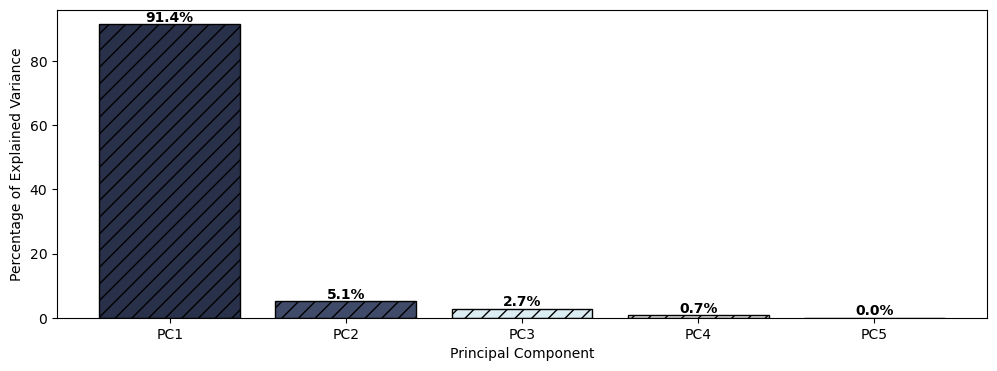

In [66]:
# Variance explained by each dimension
fig, ax = plt.subplots(figsize=(12, 4))
bars = ax.bar(x=range(1, len(per_var) + 1), height=per_var, tick_label=labels, color = colors, edgecolor='black', hatch='//')
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
for i, bar in enumerate(bars):
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
            f'{per_var[i]}%', ha='center', va='bottom', color='black', fontweight='bold')
plt.show()

In [67]:
df_result = pd.concat((df_result, pca_df, games_labels), axis = 1)

# Save dataset

In [68]:
df_result.to_csv('../data/games_normalized_clean.csv', index = False)

In [ ]:
from joblib import dump

# Exportar el PCA
dump(pca, '../models/models/pca_model.joblib')

['../models/pca_model.joblib']

In [ ]:
# Exportar el MinMaxScaler
dump(minmax_scaler, '../models/scalers/minmax_scaler.joblib')

# Exportar el RobustScaler
dump(robust_scaler, '../models/scalers/robust_scaler.joblib')

['../models/robust_scaler.joblib']